<a href="https://colab.research.google.com/github/Fatimakhanim/Deep-Learning-Projects/blob/main/deep_computer_vision_with_cnns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_sample_images
import tensorflow as tf
import matplotlib.pyplot as plt

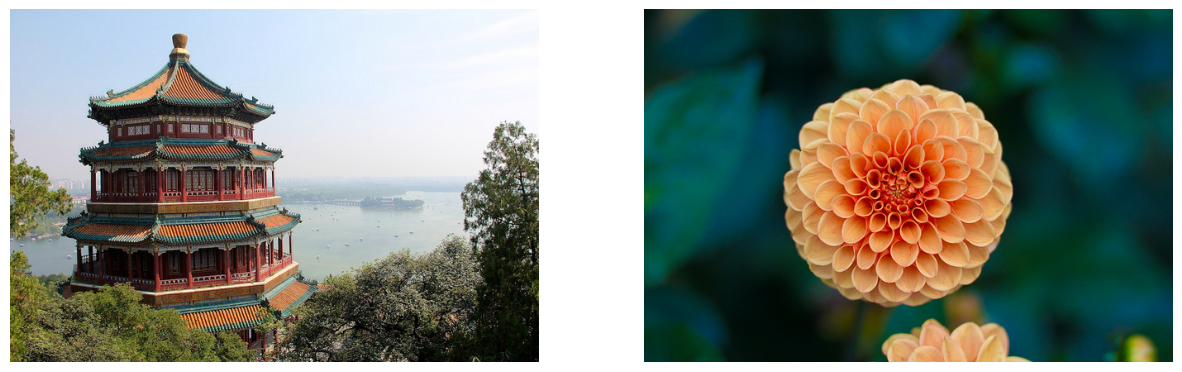

In [ ]:
images = load_sample_images()["images"]
plt.figure(figsize = (15,10))
plt.subplot(121)
plt.imshow(images[0])
plt.axis("off")
plt.subplot(122)
plt.imshow(images[1])
plt.axis("off");

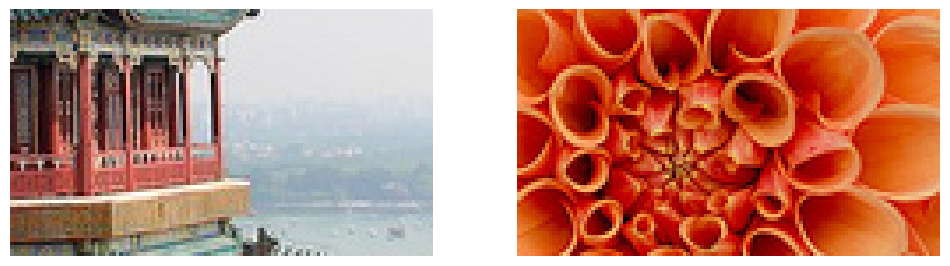

In [ ]:
images = tf.keras.layers.CenterCrop(height = 70,width = 120)(images)
images = tf.keras.layers.Rescaling(scale = 1 / 255)(images)
plt.figure(figsize = (12,8))
plt.subplot(121)
plt.imshow(images[0])
plt.axis("off")
plt.subplot(122)
plt.imshow(images[1])
plt.axis("off");

In [ ]:
tf.random.set_seed(42)
conv_layer = tf.keras.layers.Conv2D(filters = 32,
                                    kernel_size = 7)
fmaps = conv_layer(images)

In [ ]:
fmaps.shape

TensorShape([2, 64, 114, 32])

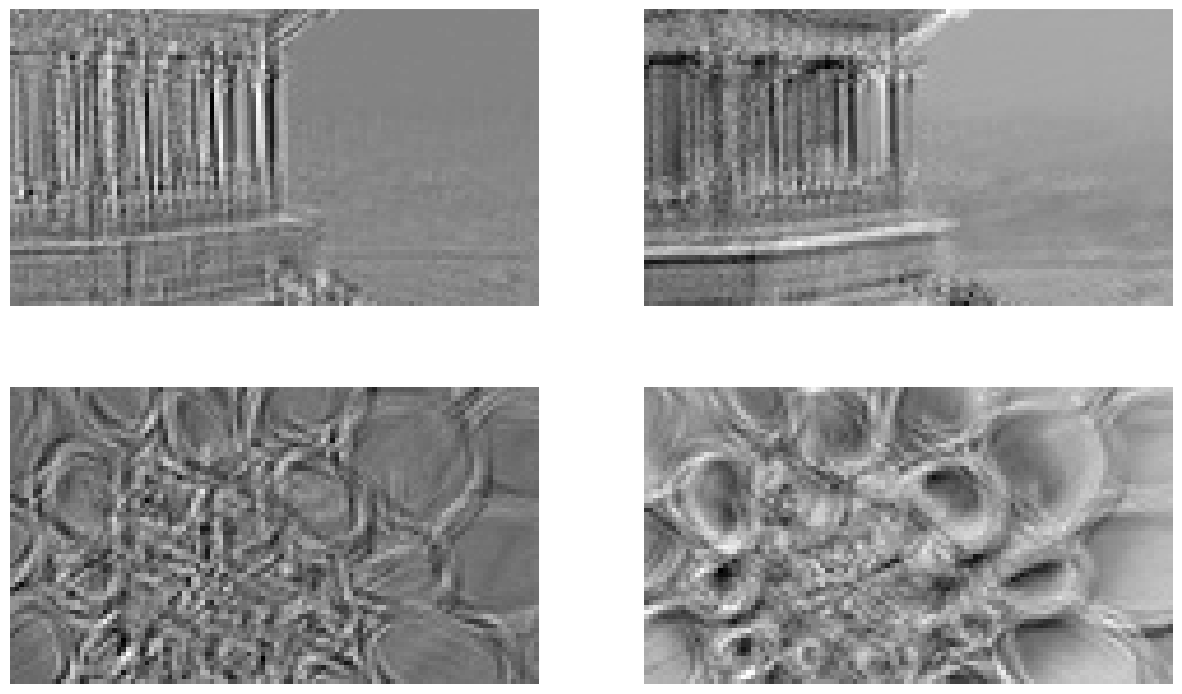

In [ ]:
plt.figure(figsize = (15,9))
for image_idx in (0,1):
  for fmap_idx in (0,1):
    plt.subplot(2,2,image_idx * 2+ fmap_idx+1)
    plt.imshow(fmaps[image_idx,:, : ,fmap_idx],cmap = "gray")
    plt.axis("off")

plt.show()

In [ ]:
conv_layer = tf.keras.layers.Conv2D(filters = 32,kernel_size = 7,
                                    padding = "same")
fmaps = conv_layer(images)

In [ ]:
fmaps.shape

TensorShape([2, 70, 120, 32])

In [ ]:
conv_layer = tf.keras.layers.Conv2D(filters = 32,kernel_size = 7,
                                    padding = "same",
                                    strides = 2
                                    )
fmaps = conv_layer(images)

In [ ]:
fmaps.shape

TensorShape([2, 35, 60, 32])

In [ ]:
import numpy as np

def conv_output_size(input_size, kernel_size, strides=1, padding="valid"):
    if padding=="valid":
        z = input_size - kernel_size + strides
        output_size = z // strides
        num_ignored = z % strides
        return output_size, num_ignored
    else:
        output_size = (input_size - 1) // strides + 1
        num_padded = (output_size - 1) * strides + kernel_size - input_size
        return output_size, num_padded

conv_output_size(np.array([70, 120]), kernel_size=10, strides=4,padding="same")

(array([18, 30]), array([8, 6]))

#Pooling Layers

#Max pooling

In [ ]:
max_pool = tf.keras.layers.MaxPool2D(pool_size = 2)

In [ ]:
output = max_pool(images)

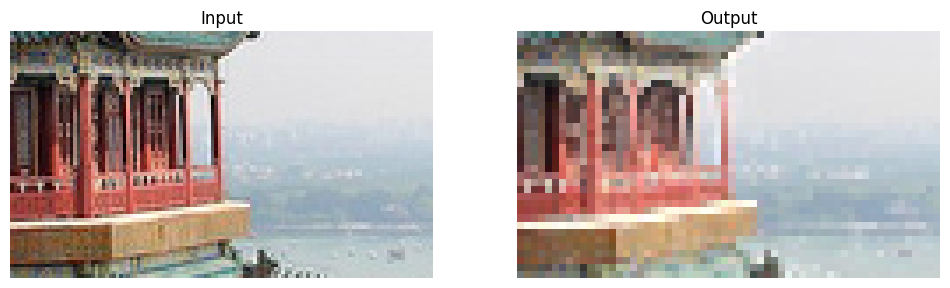

In [ ]:
import matplotlib as mpl

fig = plt.figure(figsize = (12,8))
gs = mpl.gridspec.GridSpec(nrows = 1,ncols = 2,width_ratios = [1,1])
ax1 = fig.add_subplot(gs[0,0])
ax1.set_title("Input")
ax1.imshow(images[0])
ax1.axis("off")
ax2 = fig.add_subplot(gs[0,1])
ax2.set_title("Output")
ax2.imshow(output[0])
ax2.axis("off")
plt.show()

In [ ]:
class DepthPool(tf.keras.Layer):
  def __init__(self, pool_size = 2, **kwargs):
    super().__init__(**kwargs)
    self.pool_size = pool_size

  def call(self, inputs):
    shape = tf.shape(inputs)
    groups = shape[-1] // self.pool_size
    new_shape = tf.concat([shape[:-1],[groups, self.pool_size]], axis = 0)
    return tf.reduce_max(tf.reshape(inputs,new_shape),axis = -1)

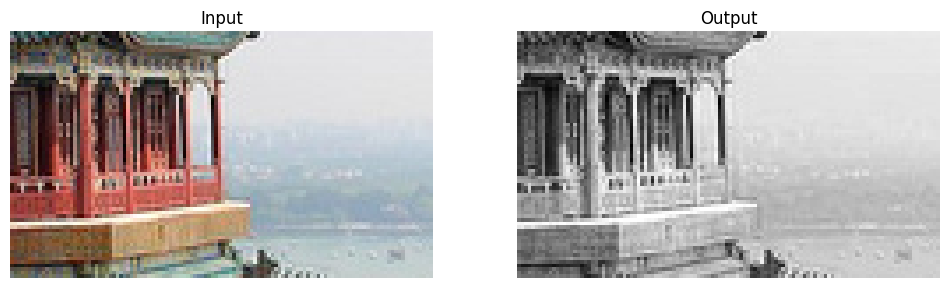

In [ ]:
depth_output = DepthPool(pool_size=3)(images)

plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
plt.title("Input")
plt.imshow(images[0])
plt.axis("off")
plt.subplot(1,2,2)
plt.title("Output")
plt.imshow(depth_output[0,...,0],cmap = "gray")
plt.axis("off")
plt.show()

In [ ]:
global_avg_pool = tf.keras.layers.GlobalAvgPool2D()

In [ ]:
global_avg_pool = tf.keras.layers.Lambda(
    lambda X: tf.reduce_mean(X,axis = [1,2])
)

In [ ]:
global_avg_pool(images)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.643388  , 0.59718215, 0.5825038 ],
       [0.7630747 , 0.26010972, 0.10848834]], dtype=float32)>

# Trackling Fashion Mnist With a CNN

In [ ]:
mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = mnist
X_train_full = np.expand_dims(X_train_full, axis=-1).astype(np.float32) / 255
X_test = np.expand_dims(X_test.astype(np.float32), axis=-1) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from functools import partial
tf.random.set_seed(42)
DefaultConv2D = partial(tf.keras.layers.Conv2D,kernel_size =3,padding = "same",
                        activation = "relu",kernel_initializer = "he_normal")

model = tf.keras.Sequential([
    DefaultConv2D(filters = 64,kernel_size = 7,input_shape = [28,28,1]),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters = 128),
    DefaultConv2D(filters = 128),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters = 256),
    DefaultConv2D(filters = 256),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 128,activation = "relu",
                          kernel_initializer = "he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units = 10, activation = "softmax")


])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = tf.keras.optimizers.Nadam(),
              metrics = ["accuracy"]
              )

In [ ]:
history = model.fit(X_train,y_train,
                    epochs = 10,
                    validation_data = (X_valid,y_valid))
score = model.evaluate(X_test, y_test)
X_new = X_test[:10]
y_pred = model.predict(X_new)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 37s 16ms/step - accuracy: 0.7535 - loss: 0.7025 - val_accuracy: 0.8614 - val_loss: 0.3640
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8817 - loss: 0.3343 - val_accuracy: 0.8968 - val_loss: 0.2793
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.9008 - loss: 0.2803 - val_accuracy: 0.8990 - val_loss: 0.2695
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9138 - loss: 0.2375 - val_accuracy: 0.9076 - val_loss: 0.2705
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9225 - loss: 0.2141 - val_accuracy: 0.9048 - val_loss: 0.2604
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9313 - loss: 0.1892 - val_accuracy: 0.9030 - val_loss: 0.2955
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.9354 - loss: 0.1781 - val_accuracy: 0.9124 - val_loss: 0.2845
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9412 - loss:

# Using Pretrained Models from Keras

In [ ]:
model = tf.keras.applications.ResNet50(weights = "imagenet")

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
import tensorflow as tf


In [ ]:
images = load_sample_images()["images"]

images_stacked = tf.stack(images,axis = 0)

images_resized = tf.keras.layers.Resizing(height = 224, width =224,
                                          crop_to_aspect_ratio = True)(images_stacked)



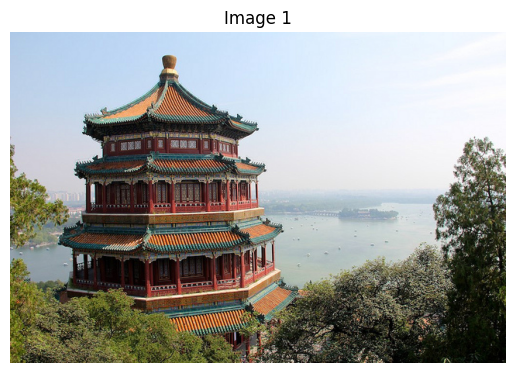

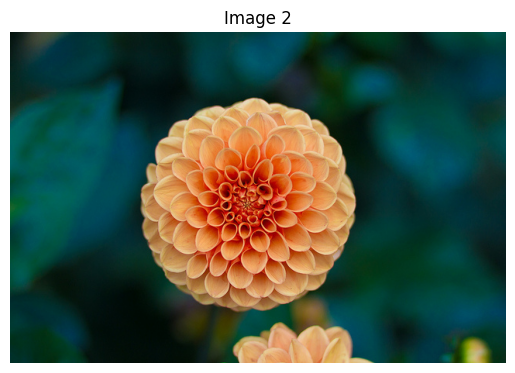

In [ ]:
import matplotlib.pyplot as plt
# Assuming 'load_sample_images' returns a dictionary with 'images' key
images = load_sample_images()["images"]

# Iterate through the images and display them individually
for i, img in enumerate(images):
    plt.figure()  # Create a new figure for each image
    plt.imshow(img)
    plt.title(f"Image {i+1}")
    plt.axis("off")
    plt.show()



In [ ]:
inputs = tf.keras.applications.resnet50.preprocess_input(images_resized)

In [ ]:
Y_proba = model.predict(inputs)
Y_proba.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


(2, 1000)

In [ ]:
top_K = tf.keras.applications.resnet50.decode_predictions(Y_proba,top = 3)
for image_index in range(len(images)):
  print(f"image #{image_index}")
  for class_id , name, y_proba in top_K[image_index]:
    print(f"{class_id}- {name:12s} {y_proba:.2%}")

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
image #0
n03877845- palace       54.44%
n03781244- monastery    24.40%
n02825657- bell_cote    19.04%
image #1
n04522168- vase         33.38%
n11939491- daisy        17.46%
n03530642- honeycomb    11.46%


In [ ]:
import tensorflow_datasets as tfds

dataset, info = tfds.load("tf_flowers", as_supervised=True, with_info=True)
dataset_size = info.splits["train"].num_examples
class_names = info.features["label"].names
n_classes = info.features["label"].num_classes

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [ ]:
dataset_size

3670

In [ ]:
class_names

['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']

In [ ]:
test_set_raw,valid_set_raw,train_set_raw = tfds.load(
    "tf_flowers",
    split = ["train[:10%]", "train[10%:25%]","train"],
    as_supervised = True
)

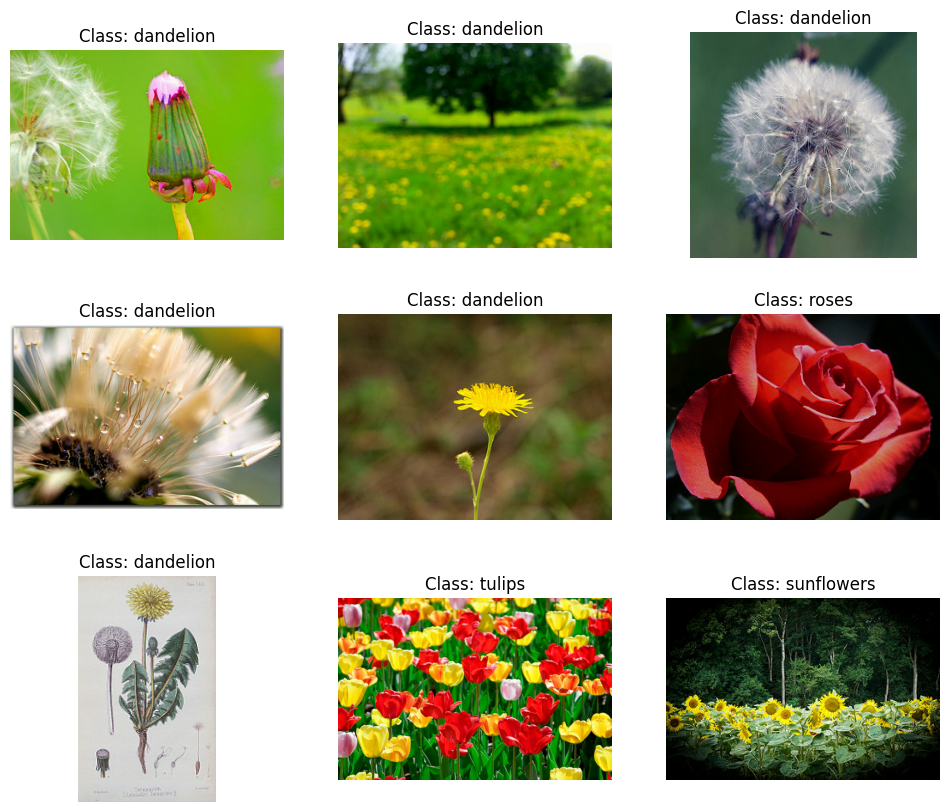

In [ ]:
plt.figure(figsize = (12,10))
index = 0
for image, label in valid_set_raw.take(9):
  index+= 1
  plt.subplot(3,3,index)
  plt.imshow(image)
  plt.title(f"Class: {class_names[label]}")
  plt.axis("off")

In [ ]:
tf.keras.backend.clear_session()
batch_size = 32
preprocess = tf.keras.Sequential([
    tf.keras.layers.Resizing(height = 224, width = 224,
                             crop_to_aspect_ratio = True),
    tf.keras.layers.Lambda(tf.keras.applications.xception.preprocess_input)
])

In [ ]:
train_set = train_set_raw.map(lambda X, y:(preprocess(X),y))
train_set = train_set.shuffle(1000,seed = 42).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(lambda X, y:(preprocess(X),y)).batch(batch_size)
test_set = test_set_raw.map(lambda X, y:(preprocess(X),y)).batch(batch_size)

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip(mode = "horizontal", seed = 42),
    tf.keras.layers.RandomRotation(factor = 0.05, seed = 42),
    tf.keras.layers.RandomContrast(factor = 0.2, seed = 42)
])

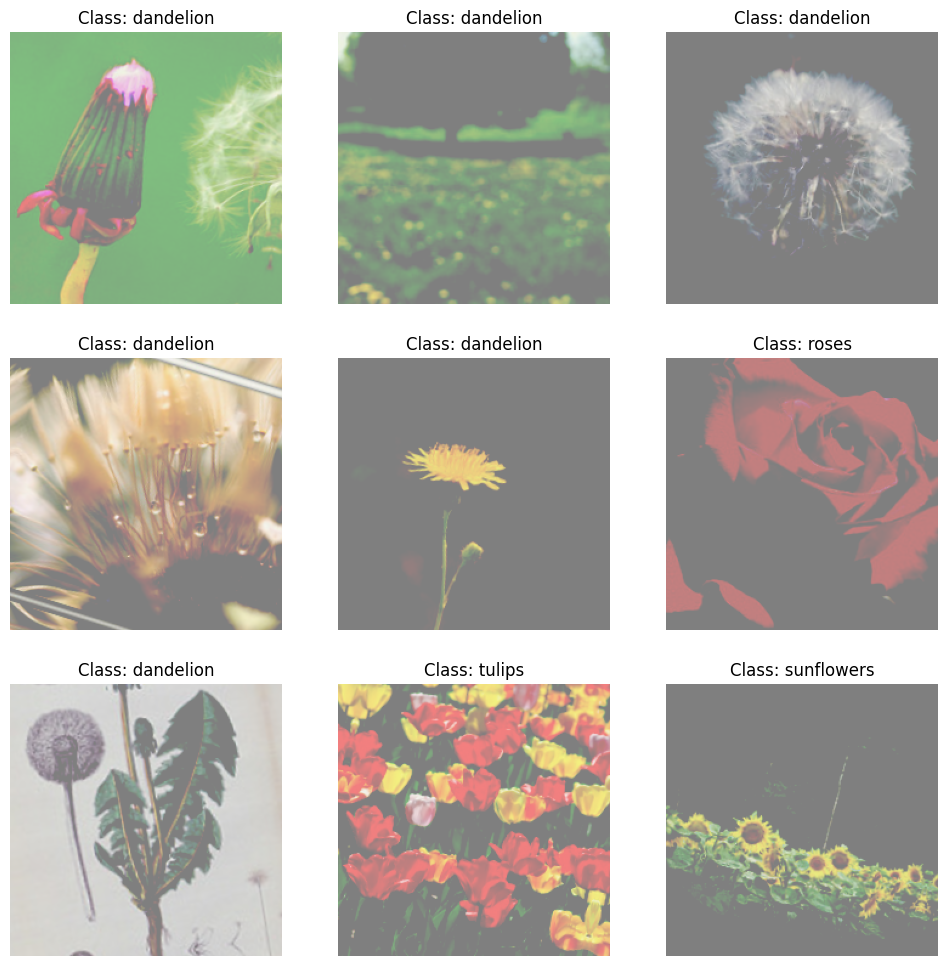

In [ ]:
plt.figure(figsize=(12, 12))
for X_batch, y_batch in valid_set.take(1):
    X_batch_augmented = data_augmentation(X_batch, training=True)
    for index in range(9):
        plt.subplot(3, 3, index + 1)
        plt.imshow(np.clip((X_batch_augmented[index] + 1) / 2, 0, 1))
        plt.title(f"Class: {class_names[y_batch[index]]}")
        plt.axis("off")

plt.show()